In [6]:
import cv2
import numpy as np
import math
import os
import random
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from PIL import Image
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

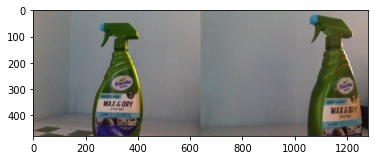

In [7]:
path1 = '../my_image_1.jpg'
path2 = '../my_image_2.jpg'
image1 = cv2.imread(path1)
image2 = cv2.imread(path2)

# gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# sift = cv2.SIFT_create()
# kp1 = sift.detect(gray1,None)
# kp2 = sift.detect(gray2,None)
# img1=cv2.drawKeypoints(gray1,kp1,image1)
# img2=cv2.drawKeypoints(gray2,kp2,image2)

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image1,None)
kp2, des2 = orb.detectAndCompute(image2,None)

images = np.hstack((image1, image2))


plt.imshow(images)
plt.show()

155


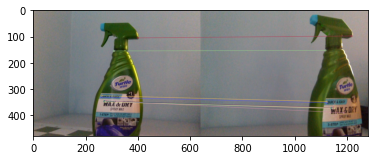

(<matplotlib.image.AxesImage at 0x7f09886fe820>, None)

In [8]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))
# Draw first 10 matches.
img3 = cv2.drawMatches(image1,kp1,image2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()